# Loads and loads combinations

`cirsoc_402` incorporates tools that allow the user to define loads and combine them according to the ultimate or service states to find the design loads of the foundation. This is done with the `Load`, `LoadGroup` and `LoadCombination` objects.

## Frame of reference

A **load** consist of a **force** and a **moment** as measured relative to a **frame of reference**. The load can be expressed in any particular frame of reference, but it exist simultaneously in all of them. When the frame of reference is shifted or rotated, the components of the force and the moment modify accordingly to reflect the expression of the load in the new frame of reference.

`cirsoc_402` defines and operates with the reference frame with the `ReferenceFrame` object. The `ReferenceFrame` object assumes that there is an absolute origin $\underline{O}$ relative to witch the position and orientation of the frame of reference is specified. By default, the `ReferenceFrame` creates a frame of reference that matches the origin:

In [1]:
from cirsoc_402 import ReferenceFrame
frame = ReferenceFrame()
frame

R = (0.00, 0.00, 0.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 1.00, 0.00)
ez = (0.00, 0.00, 1.00)

The description of the `ReferenceFrame` object indicates the position of the frame of reference with the the components of $\underline{R}$. It also shows the orientation by providing the components of the unit vectors $\underline{e}_x$, $\underline{e}_y$ and $\underline{e}_z$ corresponding to the frame of reference axis.

The frame of reference can be created at a different position by providing the positions coordinates with the `xcoord`, `ycoord` and `zcoord` parameters:

In [2]:
from cirsoc_402 import ReferenceFrame
frame = ReferenceFrame(xcoord=2, ycoord=-3, zcoord=-1)
frame

R = (2.00, -3.00, -1.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 1.00, 0.00)
ez = (0.00, 0.00, 1.00)

The `plot` method allows a fast visualization of the relative position of the reference frame to the origin $\underline{O}$.

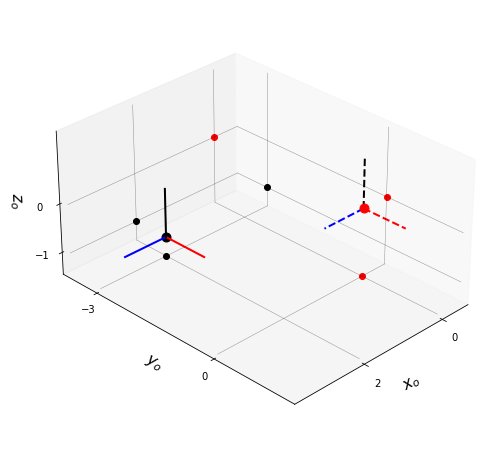

In [3]:
frame.plot()

The dotted lines represent the absolute origin $\underline{O}$ axis, while the solid lines show the position of the frame of reference. Blue is for the $x$ axis, red for the $y$ axis and black for the $z$ axis. The coordinates in the plot are expressed in the absolute origin $\underline{O}$ system, therefore $\underline{O}=\left(0,0,0\right)$ while $\underline{R}=\left(2, -3, 1\right)$.

The appearance of the plot can be modified with the `scale`, `margin`, `figsize`, `elev` and `azimut` parameters. Scale indicates the length of the axis lines. By default `scale=1`, which means that the axis are indicated with a segment of line of unitary length. When the reference system is too close or too far away from the origin, this may be inconvenient for ease of visualization.   

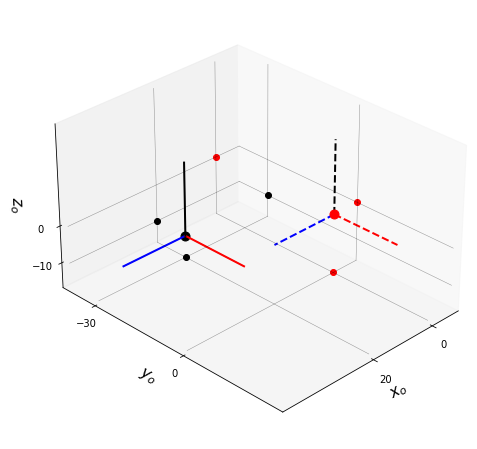

In [4]:
frame = ReferenceFrame(xcoord=20, ycoord=-30, zcoord=-10)
frame.plot(scale=20)

`margin` controls the distance of the origin and reference frame triads to the margins of the box plot. By default that distance is 10% of the overall area.

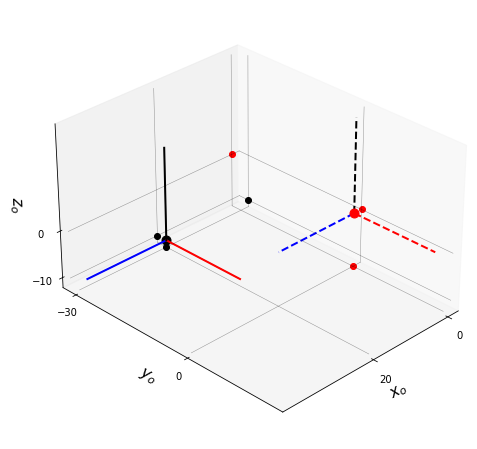

In [5]:
frame = ReferenceFrame(xcoord=20, ycoord=-30, zcoord=-10)
frame.plot(scale=20, margin=0.05)

The `figsize`, `elev` and `azimut` control the overall size of the image, and the elevation and azimut of the viewpoint.

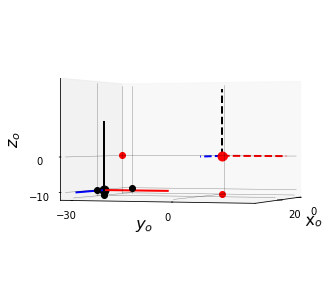

In [6]:
frame = ReferenceFrame(xcoord=20, ycoord=-30, zcoord=-10)
frame.plot(scale=20, margin=0.05, figsize=(5, 5), azimut=20, elev=0)

### Displacements

The `shift`, `xshift`, `yshift` and `zshift` methods changes the position of the `ReferenceFrame` object with the movement specified in the absolute origin $\underline{O}$ triad.

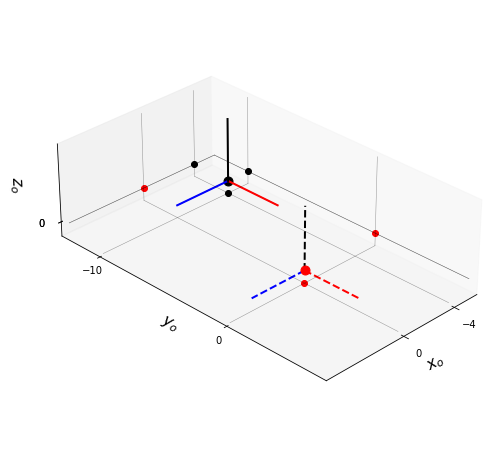

In [7]:
frame = ReferenceFrame()
frame.xshift(-4)
frame.yshift(-10)
frame.plot(scale=4)

The `shift_ref`, `xshift_ref`, `yshift_ref` and `zshift_ref` methods changes the position of the `ReferenceFrame` object with the movement specified in the frame of reference triad. As long as the frame of reference is not rotated, the `shift` and `shift_ref` methods will produce the same displacement.

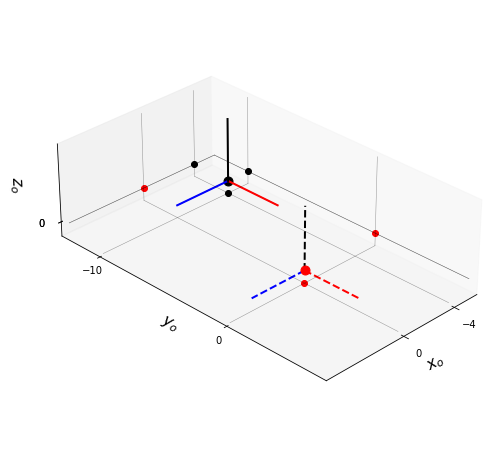

In [8]:
frame = ReferenceFrame()
frame.shift_ref(-4, -10, 0)
frame.plot(scale=4)

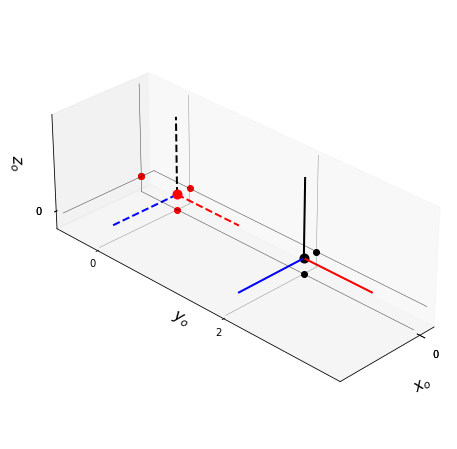

In [9]:
frame = ReferenceFrame()
frame.yshift(2)
frame.plot()

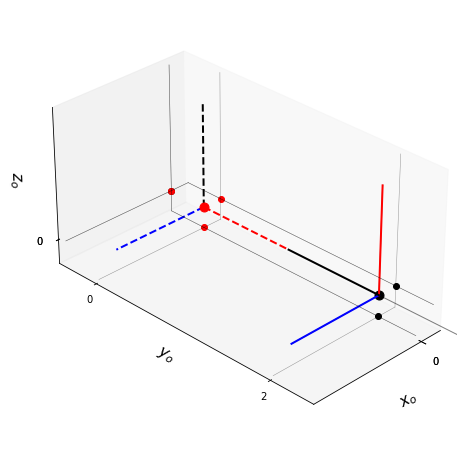

In [10]:
frame.xrotate(90)
frame.plot()

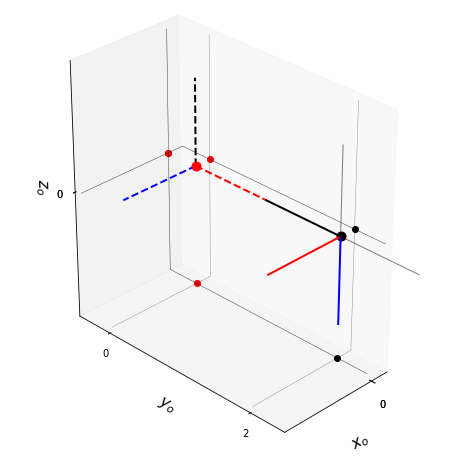

In [11]:
frame.yrotate(90)
frame.plot()

### Rotations

The `xrotate`, `yrotate` and `zrotate` methods changes the position of the `ReferenceFrame` by rotating it along the x, y and z axis of the absolute origin $\underline{O}$ triad. The rotation is specified in degrees and is carried on following the right hand rule.

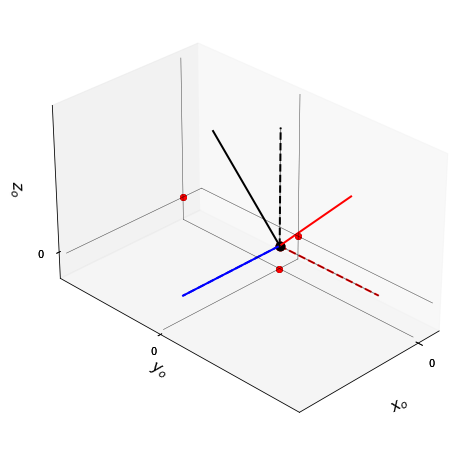

In [12]:
frame = ReferenceFrame()
frame.xrotate(45)
frame.plot()

For a rotated frame of reference, the direction versors are no longer aligned with the absolute origin axes: 

In [13]:
frame = ReferenceFrame()
frame.xrotate(45)
frame

R = (0.00, 0.00, 0.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 0.71, 0.71)
ez = (0.00, -0.71, 0.71)

With a rotated system as the one above, the difference between the `shift` and `shift_ref` methods can be clearly appreciated. For example, a unit displacement along the $y$ axis will produce difference outcomes in each case:

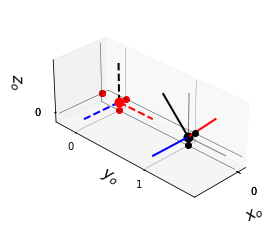

In [14]:
frame = ReferenceFrame()
frame.xrotate(45)
frame.yshift(1)
frame.plot(figsize=(4, 4), scale=0.5)

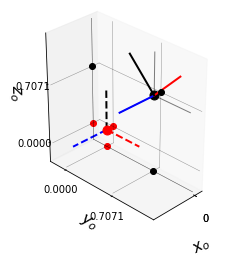

In [15]:
frame = ReferenceFrame()
frame.xrotate(45)
frame.yshift_ref(1)
frame.plot(figsize=(4, 4), scale=0.5)

The rotation is a non-commutative process. Performing an x-rotation and then a y-rotation will produce a different outcome than if the y-rotation is done first.

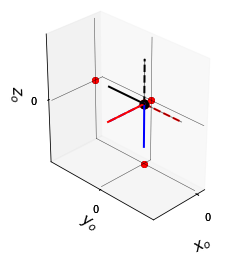

In [16]:
frame = ReferenceFrame()
frame.xrotate(90)
frame.yrotate(90)
frame.plot(figsize=(4, 4))

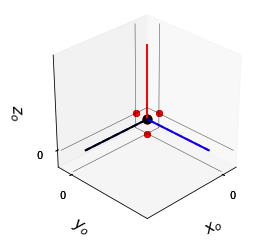

In [17]:
frame = ReferenceFrame()
frame.yrotate(90)
frame.xrotate(90)
frame.plot(figsize=(4, 4))

The `rotate_along` specifies a rotation relative to any direction defined in the absolute origin system.

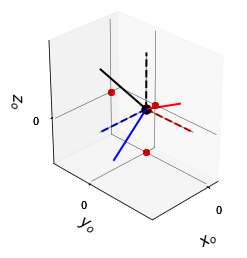

In [18]:
direction = [1, 1, 0]
frame = ReferenceFrame()
frame.rotate_along(direction, 45)
frame.plot(figsize=(4, 4))

The `xrotate_ref`, `yrotate_ref` and `zrotate_ref` methods specify rotations with respect to the frame of reference axes.

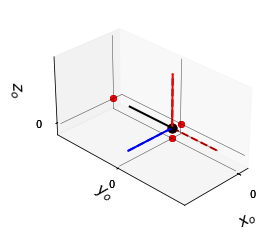

In [19]:
frame = ReferenceFrame()
frame.xrotate(90)
frame.plot(figsize=(4, 4))

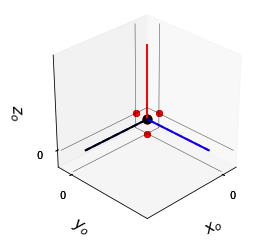

In [20]:
frame.yrotate_ref(90)
frame.plot(figsize=(4, 4))

The `rotate_along_ref` specifies a rotation relative to any direction defined in the reference frame system.

Rotations in the reference frame are managed using the `Quaternion` object.

In [21]:
from cirsoc_402.load.quaternion import Quaternion
help(Quaternion)

Help on class Quaternion in module cirsoc_402.load.quaternion:

class Quaternion(builtins.object)
 |  Quaternion(coord0, coord1, coord2, coord3)
 |  
 |  Class that defines quaternion objects used for rotating vectors
 |  in 3D space. A quaternion is a generalization of the concept of
 |  complex numbers to 3D space. Quaternions can be expressed as a real
 |  component and 3 imaginary components assoicated to the unit vectors
 |  1i, 1j and 1k:
 |  
 |  q = q0 + q1 1i + q2 1j + q3 1k
 |  
 |  Where:
 |  1i**2 = 1j**2 = 1k**2 = −1
 |  1i * 1j = 1k, 1j * 1i = −1k
 |  1j * 1k = 1i, 1k * 1j = −1i
 |  1k * 1i = 1j, 1i * 1k = −1j 
 |  
 |  A vector x = (x1, x2, x3) can be rotated an angle theta along the
 |  direction (u1, u2, u3) by defining the quaternions:
 |  
 |  p = 0 + x1 1i + x2 1j + x3 1k
 |  
 |  r = cos(theta/2) + sin(theta/2) * (u1 1i + u2 1j + u3 1k)
 |  
 |  The rotated components p' are obtained as:
 |  
 |  p' = r * p * conj(r)
 |  
 |  Where the conjugate of a quaterion is d

### Change of coordinates

Free vectors $\underline{v}$ in space are described by their component along the axis of a system or reference. By *free* is understood that the vector is not assigned to any particular point, and therefore, it's components do not depend on translations of the system of reference. However, when a system of reference is rotated, the projection of the vector along the system axis do change.

Given the unit versors $\underline{e}_x$, $\underline{e}_y$ and $\underline{e}_z$ of the reference frame and $\underline{\hat{e}}_x$, $\underline{\hat{e}}_y$ and $\underline{\hat{e}}_z$ of the absolute origin, any free vector can be expressed as:

$$\underline{v}=v_x\,\underline{e}_x+v_y\,\underline{e}_y+v_z\,\underline{e}_z = \hat{v}_x\,\underline{\hat{e}}_x+\hat{v}_y\,\underline{\hat{e}}_y+\hat{v}_z\,\underline{\hat{e}}_z$$

Where $v_k$ and $\hat{v}_k$ are the components of the vector in the reference frame and absolute origin systems. A change of coordinates $f$ is the mathematical function that maps the components from one system to another:

$$f_{o \rightarrow r}\left(\hat{v}_x,\,\hat{v}_y,\,\hat{v}_z\right) = \left(v_x,\,v_y,\,v_z\right)$$
$$f_{r \rightarrow o}\left(v_x,\,v_y,\,v_z\right)= \left(\hat{v}_x,\,\hat{v}_y,\,\hat{v}_z\right)$$

These operations are carried out by the `o2r` and `r2o` methods in the `ReferenceFrame` object.

For the following reference frame:

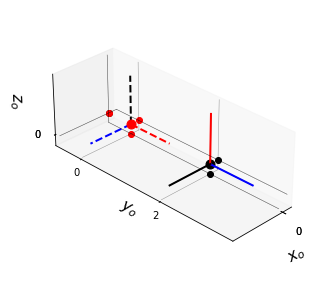

In [22]:
frame = ReferenceFrame()
frame.zrotate(90); frame.yrotate(90); frame.yshift(2)
frame.plot(figsize=(5, 5))

A vector with components $\left(1, 0, 0\right)$ along the origin axis is expressed in the frame of reference as: 

In [23]:
frame.o2r([1, 0, 0])

array([0., 0., 1.])

In [24]:
frame.r2o([1, 0, 0])

array([0., 1., 0.])

In [25]:
import numpy as np
frame.o2r([1/np.sqrt(2), 1/np.sqrt(2), 0])

array([0.70710678, 0.        , 0.70710678])

### Position vectors

Position vectors $\underline{p}$ define a fixed point in space. 

In [23]:
frame.pos_o2r([0, 1, 0])

array([-1.,  0.,  0.])

In [24]:
frame.pos_o2r([1, 0, 0])

array([-2.,  0.,  1.])

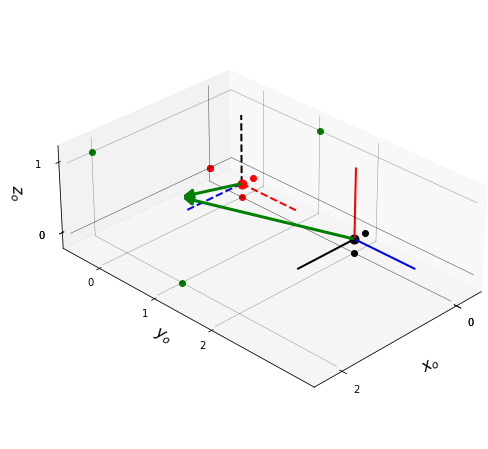

In [25]:
frame.plot_position([-1, 1, 2], 'reference', scale=1)

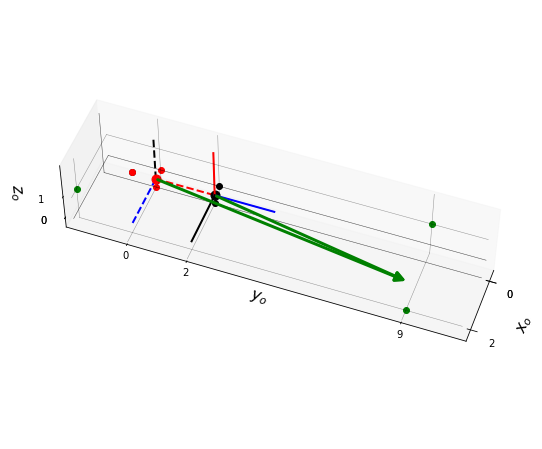

In [26]:
frame.plot_position([7, 1, 2], 'reference', scale=2, elev=50, azimut=20)

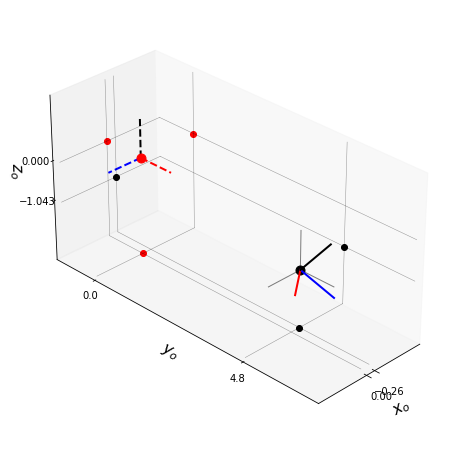

In [27]:
frame = ReferenceFrame()
frame.zrotate(130)
frame.yrotate(-76)
frame.zrotate_ref(-19)
frame.yshift(2)
frame.xshift_ref(3)
frame.plot()

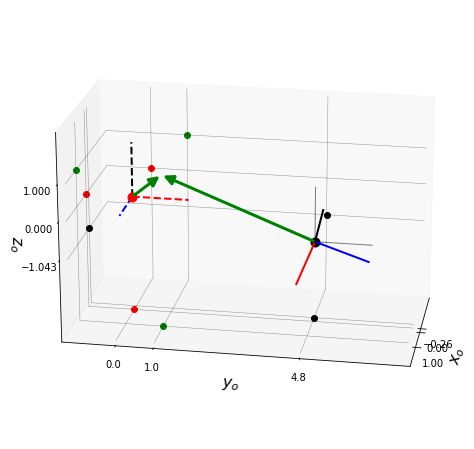

In [28]:
frame.plot_position([1, 1, 1], 'origin', scale=1.5, azimut=10, elev=20)

## Loads

A load is defined by the components of the force and moment vectors expressed in a reference coordinate system. `cirsoc_402` uses the `Load` object to create and manipulate loads. When a load is created with `Load` the load type must be specified. Load types refers to the **xxxx** of the load. The accepted load types are specified in the constant `cirsoc_402.constants.LOAD`.

In [29]:
from cirsoc_402.constants import LOAD
LOAD

['D', 'Di', 'E', 'F', 'Fa', 'H', 'L', 'Lr', 'R', 'S', 'T', 'W', 'Wi']

The assigned load type is used for combining the load into the service and ultimate load combinations. The load type is the only necessary input to create a load, all the other inputs being optional.

In [30]:
from cirsoc_402 import Load
load = Load('D')
load

 (D)
F = (0.00, 0.00, 0.00)
M = (0.00, 0.00, 0.00)
At reference frame:
R = (0.00, 0.00, 0.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 1.00, 0.00)
ez = (0.00, 0.00, 1.00)

Loads are defined in a cartesian coordinate system with axis $x$, $y$ and $z$. The force $\underline{F}$ and moment $\underline{M}$ vectors are decomposed in the components assocciate to each axis: $\underline{F}=F_x\,\underline{e}_x + F_y\,\underline{e}_y+F_z\,\underline{e}_z$ and $\underline{M}=M_x\,\underline{e}_x + M_y\,\underline{e}_y+M_z\,\underline{e}_z$, where $\underline{e}_k$ is the unit vector in the k-axis. The `xforce`, `yforce` and `zforce` parameters of the `Load` object represent the $F_x$, $F_y$ and $F_z$ components, while `xmoment`, `ymoment` and `zmoment` are $M_x$, $M_y$ and $M_z$.

<div><img src="reference_system.png" width="500px"></div>

**Figure 1: Load components.**
<a id="fig-load_components"></a>

Only the non-zero components of the loads need to be specified when creating it. Besides the load type, a name can be assigned to the load to identify it.

In [31]:
from cirsoc_402 import Load
dlc1 = Load('D', xforce=10, yforce=-5, zmoment=4, name='column 1')
dlc1

column 1 (D)
F = (10.00, -5.00, 0.00)
M = (0.00, 0.00, 4.00)
At reference frame:
R = (0.00, 0.00, 0.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 1.00, 0.00)
ez = (0.00, 0.00, 1.00)

### Visualization

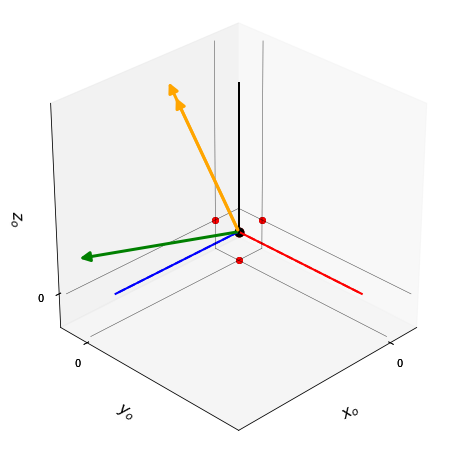

In [32]:
from cirsoc_402 import Load
dlc1 = Load('D', xforce=10, yforce=-5, zmoment=4, ymoment=-3, name='column 1')
dlc1.plot()

### Change of reference frame

In [33]:
from cirsoc_402 import Load
dlc1 = Load('D', xforce=10, yforce=-5, xmoment=10, ymoment=5, zmoment=-4, name='column 1')
dlc1.xshift(10.0)
dlc1

column 1 (D)
F = (10.00, -5.00, 0.00)
M = (10.00, 5.00, 46.00)
At reference frame:
R = (0.00, 0.00, 0.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 1.00, 0.00)
ez = (0.00, 0.00, 1.00)

In [34]:
dlc1.xshift(-10)
dlc1

column 1 (D)
F = (10.00, -5.00, 0.00)
M = (10.00, 5.00, -4.00)
At reference frame:
R = (0.00, 0.00, 0.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 1.00, 0.00)
ez = (0.00, 0.00, 1.00)

In [35]:
dlc1.shift(3, 2, 1)
dlc1

column 1 (D)
F = (10.00, -5.00, 0.00)
M = (5.00, -5.00, 31.00)
At reference frame:
R = (0.00, 0.00, 0.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 1.00, 0.00)
ez = (0.00, 0.00, 1.00)

### Operations

In [36]:
dlc1 = Load('D', xforce=10, yforce=-5, xmoment=10, ymoment=5, zmoment=-4, name='column 1')
dlc1

column 1 (D)
F = (10.00, -5.00, 0.00)
M = (10.00, 5.00, -4.00)
At reference frame:
R = (0.00, 0.00, 0.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 1.00, 0.00)
ez = (0.00, 0.00, 1.00)

In [37]:
dlc2 = Load('D', xforce=30, zforce=9, yforce=-5, xmoment=10, ymoment=5, zmoment=-4, name='column 1')
dlc2

column 1 (D)
F = (30.00, -5.00, 9.00)
M = (10.00, 5.00, -4.00)
At reference frame:
R = (0.00, 0.00, 0.00)
ex = (1.00, 0.00, 0.00)
ey = (0.00, 1.00, 0.00)
ez = (0.00, 0.00, 1.00)

In [38]:
dlc1 + dlc2

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

## Load groups

 `LoadGroup` objects combine different loads adding them by their load type. They are particularly useful to define the set of loads acting at once on a foundation. As with the loads, the load group is associated to a reference cartesian system defined by its position $\underline{O}$ and the rotation of each axis ${\theta}$. Individual loads are incorporated into the `LoadGroup` by adding them. The addition takes into consideration the reference system of each load and transforms the force and moment components to the reference system of the `LoadGroup`.
 
 The following example considers the case of a single foundation on which four columns rest. Each column has their own dead , live and wind loads, defined in the coordinate system of the column.

<div><img src="load_group_1.png" width="400px"></div>

**Figure 2: Foundation with four columns, each with it's own reference system.**
<a id="fig-load_grou_1"></a>

The resultant forces acting on the foundation can be easily determined with a `LoadGroup`.

In [ ]:
from cirsoc_402 import ReferenceFrame
from cirsoc_402 import Load
from cirsoc_402 import LoadGroup


ref_col1 = ReferenceFrame(xcoord=-4, ycoord=3)
c1d = Load('D', zforce = -15, name='column 1 dead',  reference=ref_col1)
c1l = Load('L', zforce = -15, xmoment=4, ymoment=5, name='column 1 live', reference=ref_col1)

ref_col2 = ReferenceFrame(xcoord=4, ycoord=3)
c2d = Load('D', zforce = -15, name='column 2 dead', reference=ref_col2)
c2l = Load('L', zforce = -15,  xmoment=6, ymoment=3.5, name='column 2 live', reference=ref_col2)

ref_col3 = ReferenceFrame(xcoord=4, ycoord=-3)
c3d = Load('D', zforce = -20, name='column 3 dead', reference=ref_col3)
c3l = Load('L', zforce = -5, xmoment=7, ymoment=5, name='column 3 live', reference=ref_col3)

ref_col4 = ReferenceFrame(xcoord=-4, ycoord=-3)
c4d = Load('D', zforce = -20, name='column 4 dead', reference=ref_col4)
c4l = Load('L', zforce = -5, xmoment=7, ymoment=5, name='column 4 live', reference=ref_col4)

lgroup = LoadGroup()
lgroup = lgroup + c1d + c1l + c2d + c2l + c3d + c3l + c4d + c4l
lgroup

### Operations

### Change of reference system

The position of the reference system of the `LoadGroup` can be modified with the `xshift`, `yshift`, `zshift` and `shift` functions:

In [ ]:
lgroup.shift(15, -3, 2)
lgroup

The orientation of the axis can be modified with the `xrotate`, `yrotate`, `zrotate` and `rotate` functions. For a 45 degrees rotation around the z axis:

In [ ]:
lgroup.zrotate(45)
lgroup

The reference system can be returned to the origin with the `toorigin` function.

In [ ]:
lgroup.to_origin()
lgroup

The current reference system can be adopted as the origin with the `resetorigin` function.

In [ ]:
lgroup.xshift(10)
lgroup.xrotate(10)
lgroup

In [ ]:
lgroup.resetorigin()
lgroup

## Load combinations

In [ ]:
from cirsoc_402 import Load
from cirsoc_402 import LoadGroup
from cirsoc_402 import LoadCombination


ref_col1 = ReferenceFrame(xcoord=-4, ycoord=3)
c1d = Load('D', zforce = -15, name='column 1 dead',  reference=ref_col1)
c1l = Load('L', zforce = -15, xmoment=4, ymoment=5, name='column 1 live', reference=ref_col1)

ref_col2 = ReferenceFrame(xcoord=4, ycoord=3)
c2d = Load('D', zforce = -15, name='column 2 dead', reference=ref_col2)
c2l = Load('L', zforce = -15,  xmoment=6, ymoment=3.5, name='column 2 live', reference=ref_col2)

ref_col3 = ReferenceFrame(xcoord=4, ycoord=-3)
c3d = Load('D', zforce = -20, name='column 3 dead', reference=ref_col3)
c3l = Load('L', zforce = -5, xmoment=7, ymoment=5, name='column 3 live', reference=ref_col3)

ref_col4 = ReferenceFrame(xcoord=-4, ycoord=-3)
c4d = Load('D', zforce = -20, name='column 4 dead', reference=ref_col4)
c4l = Load('L', zforce = -5, xmoment=7, ymoment=5, name='column 4 live', reference=ref_col4)

lgroup = LoadGroup()
lgroup = lgroup + c1d + c1l + c2d + c2l + c3d + c3l + c4d + c4l
loadcom = LoadCombination(lgroup)
loadcom

In [ ]:
loadcom._loadcombinations

In [ ]:
loadcom._loadgroup

### Change of reference system

The `xshift`, `yshift`, `zshift`, `shift`, `xrotate`, `yrotate`, `zrotate`, `rotate`, `toorigin` and `resetorigin` functions modify the load combinations and the load group coordinate systems. 

In [ ]:
loadcom.xshift(1)
loadcom

In [ ]:
loadcom._loadgroup

### Load combination selection